# 025 Obtaining Data via an API

> COM6018

*Copyright © 2023–2025 Jon Barker, University of Sheffield. All rights reserved.*


## 1 Introduction

In the previous tutorial, we learned how to read data from a local file. In the lab class, we used these ideas to read a large dataset from a CSV file. This is all very well, but in the real world we are often dealing with live data that is constantly changing. For example, we may have daily updated climate data, stock prices, weather data, etc. In these cases, it is not practical to download and store a local copy of the data, as it will quickly become out of date. Instead, we need to be able to access the data directly from the source.

In this tutorial, we’ll use Python to pull data from a remote server that serves live (i.e., continually updated) data. The most common way to do this is via an API (Application Programming Interface): code running on the server that exposes a simple set of instructions for clients to request data or services.

## 2 Using an API

The most common way to access an API is via HTTP requests. HTTP requests were initially developed to allow web browsers to communicate with web servers, but they can also be used by other programs (like Python scripts) to communicate with remote servers.

HTTP supports different request methods, the most common of which are:

- GET: used to retrieve data from a server.
- POST: used to send data to a server.
- PUT: used to update data on a server.
- DELETE: used to delete data from a server.

As we are interested in obtaining data, we will focus on the GET method.

To make an HTTP request in Python, we can use `urllib`, which is part of the standard Python library. However, `urllib` is a low-level library that is not very user-friendly. A better option is to install an external library. There are two which are commonly used: `httpx` and `requests`. In this tutorial, we will use `httpx`, which is modern and easy to use, and covers more use cases than `requests`.

To use `httpx`, you will need to install it first. If you are using a virtual environment managed by `uv` (which you should be) then you can add it to your environment by running the following command in your terminal:

```shell
uv add httpx
```

:::{note}
Full documentation for `httpx` can be found at: <https://www.python-httpx.org/>
:::

## 3 Obtaining Data via an API

To obtain data via an API, we’ll make an HTTP GET request. The server receives the request, processes it, and returns a response that includes a status code (success or error) and, if successful, the requested data. The response will typically contain a status code (indicating whether the request was successful or not) and the data that was requested.

### 3.1 Synchronous vs Asynchronous Requests

By default, your Python program waits for the server to respond before continuing; this is a synchronous request. If the server is slow, your program can feel unresponsive. In some applications you can avoid this by doing other work while waiting for the response—i.e., using asynchronous (async) requests. `httpx` supports both styles. In this tutorial we’ll stick to synchronous requests because they’re simpler and sufficient for our needs.

### 3.2 Status Codes

The HTTP response contains two parts: the status code and the data. The status code is a three-digit number that indicates whether the request was successful or not. A status code in the 200s indicates success, while a status code in the 400s or 500s indicates an error.

There are a number of status codes that can be returned. The most common codes are:

- 200: OK (the request was successful)
- 400: Bad Request (the request was malformed)
- 401: Unauthorized (you need to authenticate to access the requested resource)
- 403: Forbidden (you do not have permission to access the requested resource)
- 404: Not Found (the requested resource could not be found)
- 500: Internal Server Error (the server encountered an error)

For example, the 404 status code is what a web server will return if you try to access a web page that does not exist.

### 3.3 The Response Data

The data returned by the server will typically be in one of several formats, the most common of which are:

- JSON (JavaScript Object Notation): a lightweight data format that is easy to read and write. It is the most common format for APIs.
- XML (eXtensible Markup Language): a markup language that is used to store and transport data. It is less common than JSON, but is still used by some APIs.
- CSV (Comma-Separated Values): a simple text format that is used to store tabular data.
  
Most modern data science APIs will provide a JSON response, as it is easy to work with in Python, and we will focus on this format in this tutorial. You will need to refer to the documentation for the specific API to find out the options for the format of the data that is returned.

### 3.4 The Endpoint and Parameters

An API is typically accessed via a specific URL. This URL is known as the endpoint. The endpoint will often include parameters that can be used to filter or modify the data that is returned.

For the service that you are using, you will need to know the valid endpoints. For example, an API for obtaining a 5-day forecast from a weather service might have an endpoint like:

```text
https://api.weather.com/v3/wx/forecast/daily/5day
```

This endpoint may accept additional parameters, such as, in the case of a weather service, the location for which you want the forecast. These parameters are typically added to the endpoint URL as query strings. For example, to get the 5 day forecast for London, you might use the following URL:

```text
https://api.weather.com/v3/wx/forecast/daily/5day?location=London
```

The exact endpoint and parameters depend on the API. Always check the API’s documentation for the correct URLs and query options.

## 4 Examples: Obtaining Data from a Public API

In this section, we will look at examples of how to obtain data from various public APIs.

Note that APIs can be considered as being in one of three categories:

- **Open APIs**: These are fully public APIs that can be accessed by anyone without authentication or registration. They’re often used to provide open data or general information.
- **Keyed APIs (Public with Registration)**:
These APIs require an API key for access, but anyone can obtain a key by signing up for a free account. The key helps the provider track usage and enforce rate limits, but access is still open to the public.

- **Restricted APIs (Private or Controlled Access)**:
These APIs also require an API key (or another form of authentication), but access is limited to specific users — for example, members of an organisation, paying customers, or approved partners. The data or functionality is not freely available to the public.

We will focus on Open APIs for simplicity, but the same principles apply to Keyed and Restricted APIs, except that you will need to include your API key in the request (usually as a query parameter or in the request headers).

### 4.1 Example 1: Obtaining UK Street Crime Data

The UK Police provide an open API that allows you to access street-level crime data. The API is documented at: <https://data.police.uk/docs/>

The API allows you to specify a month and a location (latitude and longitude) to obtain a list of all the reported street crime for a 1-mile radius around that location for the specified month. The data is returned in JSON format and includes details such as the type of crime, the location, and the outcome.

In the example below, we use the API to obtain street crime within a 1-mile radius of the University Diamond Building in the month of March 2024. In order to construct the endpoint, I used Google Maps to find the latitude and longitude of the Diamond Building, which are 53.3814256 and -1.4835736 respectively. The endpoint is then constructed following the API documentation.

In [1]:
import httpx
from pprint import pprint


# Define the endpoint and parameters
endpoint = "https://data.police.uk/api/crimes-street/all-crime?date=2024-03&lat=53.3814256&lng=-1.4835736"

# Make the GET request
response = httpx.get(endpoint)

# Check the status code
if response.status_code == 200:
    # Parse the JSON string into a Python data structure
    data = response.json()
    # Print the first 2 records
    # Using pprint (i.e. pretty print) to make the output more readable
    pprint(data[:2])
else:
    print(f"Error: {response.status_code}")

/Users/jon/shared/teaching/Modules/COM6018_jb/.venv/bin/python: No module named uv


Note: you may need to restart the kernel to use updated packages.


The request returns a response object. Access the status code via response.status_code. If the request succeeds, response.json() parses the JSON into Python objects. In this case the result is a list of dictionaries, one per record (the same structure you’d get from reading JSON from a file or a CSV via csv.DictReader).

We are printing just the first 2 records to keep the output manageable. If you run the code, you will see the following output:

```json
[
  {
    "category": "anti-social-behaviour",
    "location_type": "Force",
    "location": {
      "latitude": "53.383629",
      "street": {
        "id": 1716093,
        "name": "On or near Angel Street"
      },
      "longitude": "-1.465952"
    },
    "context": "",
    "outcome_status": null,
    "persistent_id": "",
    "id": 117624171,
    "location_subtype": "",
    "month": "2024-03"
  },
  {
    "category": "anti-social-behaviour",
    "location_type": "Force",
    "location": {
      "latitude": "53.379832",
      "street": {
        "id": 1715247,
        "name": "On or near Rockingham Street"
      },
      "longitude": "-1.475319"
    },
    "context": "",
    "outcome_status": null,
    "persistent_id": "",
    "id": 117627155,
    "location_subtype": "",
    "month": "2024-03"
  },
  ...
]
```

To understand the data, you will need to refer to the API documentation, which explains the meaning of each field. It appears that in the Sheffield region, the 'outcome_status' field is not being populated, as it is `null` for all the records. If you change the location to somewhere else, you may find that this field is populated.

Depending on your application, you might save the data to a file for later analysis, or process it immediately.

### A Note on Data Licences

When you use an API, the data belongs to a third party (here, the UK Police). It’s important to understand your rights and obligations under the data licence. Licence information is usually linked from the same site that documents the API. Always read it before using the data—for example, some licences restrict commercial use, redistribution, or local storage.

In this case, we can find the licence at <https://data.police.uk/>. Here it is stated that: "All the data on this site is made available under the Open Government Licence v3.0." and a [link to the licence is provided](
https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

It is worth reading the licence to see an example of the type of conditions that may apply to the use of data obtained via an API.

We are not going to go into details of Data Licences in this module, but there will be other modules in your programme that cover legal and ethical issues in data science in detail. You will need to consider these issues carefully if you are using 3rd party data in your dissertation project.

### 4.2 Example 2: UK Energy Generation Carbon Intensity API

The UK National Energy System Operator (NESO) is the publicly owned organisation that operates the UK’s gas and electricity systems. Day to day, electricity comes from a changing mix of sources—fossil fuels (coal, gas, oil), nuclear, and renewables (wind, solar, hydro). Each source has a different carbon intensity: the amount of CO₂ emitted per unit of energy.

NESO provides an open API that allows you to access real-time and historic data showing how the energy mix and carbon intensity has changed hour-by-hour. The API is documented at: <https://carbon-intensity.github.io/api-definitions/#carbon-intensity-api-v2-0-0>.
We will use it to obtain data for a one week period in March 2024.

The endpoint for energy intensity requests is:

```text
https://api.carbonintensity.org.uk/intensity/
```

There are then different options for specifying the time period by extending the URL. The most general takes the form `/intensity/{from}/{to}`, where `{from}` and `{to}` are the start and end times in ISO 8601 format. For example, to get data from 1st March 2024 to 7th March 2024, we would use the following URL:

```text
https://api.carbonintensity.org.uk/intensity/2024-03-01T00:00Z/2024-03-07T23:59Z
```

Similarly, the `/generation/` endpoint returns the hour-by-hour mix of generation sources for a time period. For the same week:

```text
https://api.carbonintensity.org.uk/generation/2024-03-01T00:00Z/2024-03-07T23:59Z
```

We can get the intensity data from the API using exactly the same approach as in the previous example, where the only difference is the endpoint URL.

In [2]:
import httpx
endpoint = "https://api.carbonintensity.org.uk/intensity/2024-03-01T00:00Z/2024-03-07T23:59Z"

# Make the GET request
response = httpx.get(endpoint)

# Check the status code
if response.status_code == 200:
    # Parse the JSON string into a Python data structure
    data = response.json()
else:
    print(f"Error: {response.status_code}")

[{'category': 'anti-social-behaviour',
  'context': '',
  'id': 116199753,
  'location': {'latitude': '53.380685',
               'longitude': '-1.472405',
               'street': {'id': 1715555,
                          'name': 'On or near Sports/recreation Area'}},
  'location_subtype': '',
  'location_type': 'Force',
  'month': '2024-01',
  'outcome_status': None,
  'persistent_id': ''},
 {'category': 'anti-social-behaviour',
  'context': '',
  'id': 116187209,
  'location': {'latitude': '53.384393',
               'longitude': '-1.470016',
               'street': {'id': 1715737, 'name': 'On or near Paradise Street'}},
  'location_subtype': '',
  'location_type': 'Force',
  'month': '2024-01',
  'outcome_status': None,
  'persistent_id': ''}]


For this API, the data is not directly stored as a list of records, but the records are stored in an outer dictionary, with the key 'data', i.e., as follows

```json
{
  "data": [
    {
      "from": "2024-03-01T00:00Z",
      "to": "2024-03-01T00:30Z",
      "intensity": {
        "forecast": 181,
        "actual": 175,
        "index": "moderate"
      }
    },
    {
      "from": "2024-03-01T00:30Z",
      "to": "2024-03-01T01:00Z",
      "intensity": {
        "forecast": 179,
        "actual": 174,
        "index": "moderate"
      }
    },
    ...
  ]
}
```

To access the first record you’d use data['data'][0]. You can make this tidier by assigning records = data['data'], but here we’ll access it directly. To inspect a couple of entries:

In [3]:
from pprint import pprint
# Print the first 2 records
pprint(data['data'][:2])

[{'from': '2024-02-29T23:30Z',
  'intensity': {'actual': 155, 'forecast': 172, 'index': 'moderate'},
  'to': '2024-03-01T00:00Z'},
 {'from': '2024-03-01T00:00Z',
  'intensity': {'actual': 157, 'forecast': 174, 'index': 'moderate'},
  'to': '2024-03-01T00:30Z'}]


Note that each record has keys 'from' and 'to', which give the start and end times for the record (each represents half an hour), 'actual' and 'forecast', which are the actual and forecast carbon intensity values (in gCO2/kWh), and 'index', which is a qualitative measure of the intensity (e.g., low, moderate, high, very high).

The bit of code below uses a list comprehension to extract the 'actual' intensity values from each dictionary into a simple list of numbers. This is a common operation when working with data in Python, and you will see it often.

In [4]:
# Extract the actual intensity values into a list
actual_intensities = [record['intensity']['actual'] for record in data['data']]

Although we have not yet covered plotting, we can use the `matplotlib` library to create a simple plot of the intensity values over the week.

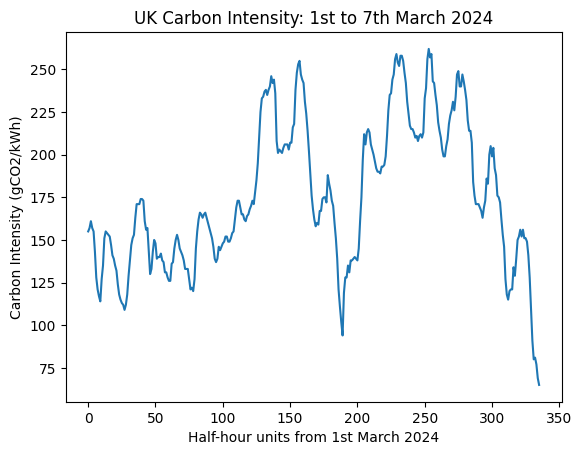

In [5]:
import matplotlib.pyplot as plt
plt.plot(actual_intensities)
plt.xlabel('Half-hour units from 1st March 2024')
plt.ylabel('Carbon Intensity (gCO2/kWh)')
plt.title('UK Carbon Intensity: 1st to 7th March 2024')
plt.show()

In [6]:
import httpx
endpoint = "https://api.carbonintensity.org.uk/generation/2024-03-01T00:00Z/2024-03-07T23:59Z"

# Make the GET request
response = httpx.get(endpoint)

# Check the status code
if response.status_code == 200:
    # Parse the JSON string into a Python data structure
    data = response.json()
else:
    print(f"Error: {response.status_code}")

In [7]:
from pprint import pprint
# Print the first 2 records
pprint(data['data'][:2])

[{'from': '2024-02-29T23:30Z',
  'generationmix': [{'fuel': 'biomass', 'perc': 8.9},
                    {'fuel': 'coal', 'perc': 0},
                    {'fuel': 'imports', 'perc': 25},
                    {'fuel': 'gas', 'perc': 29.7},
                    {'fuel': 'nuclear', 'perc': 14.8},
                    {'fuel': 'other', 'perc': 0},
                    {'fuel': 'hydro', 'perc': 2.1},
                    {'fuel': 'solar', 'perc': 0},
                    {'fuel': 'wind', 'perc': 19.5}],
  'to': '2024-03-01T00:00Z'},
 {'from': '2024-03-01T00:00Z',
  'generationmix': [{'fuel': 'biomass', 'perc': 9},
                    {'fuel': 'coal', 'perc': 0},
                    {'fuel': 'imports', 'perc': 25},
                    {'fuel': 'gas', 'perc': 30.1},
                    {'fuel': 'nuclear', 'perc': 14.8},
                    {'fuel': 'other', 'perc': 0},
                    {'fuel': 'hydro', 'perc': 2.1},
                    {'fuel': 'solar', 'perc': 0},
                    {'fuel': 

Next, extract the percentage of gas in the generation mix for each half-hour and plot it. Each record has a generationmix list of dictionaries—one per fuel type—so we grab the gas entry’s perc value for every timestamp.

In [8]:
# Extract the percentage of gas in the generation mix into a list

GAS_INDEX = 3  # Index of gas in the generation mix list
gas_percentages = [record['generationmix'][GAS_INDEX]['perc'] for record in data['data']]

Finally, we will plot both the intensity and gas percentage on the same figure for comparison.

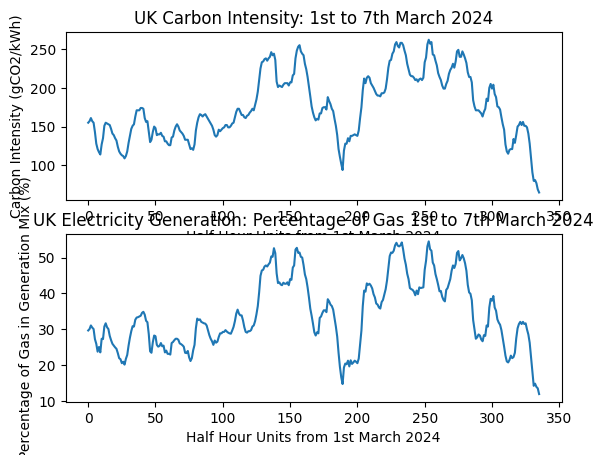

In [9]:
import matplotlib.pyplot as plt

plt.subplot(2,1, 1)
plt.plot(actual_intensities)
plt.xlabel('Half Hour Units from 1st March 2024')
plt.ylabel('Carbon Intensity (gCO2/kWh)')
plt.title('UK Carbon Intensity: 1st to 7th March 2024')

plt.subplot(2,1, 2)
plt.plot(gas_percentages)
plt.xlabel('Half Hour Units from 1st March 2024')
plt.ylabel('Percentage of Gas in Generation Mix (%)')
plt.title('UK Electricity Generation: Percentage of Gas 1st to 7th March 2024')
plt.show()

We can compare the two plots and see that they are strongly correlated. This is because gas is a highly carbon-intensive source of energy, and also the one that varies most over the week. In effect, gas-fired generators are switched on and off to meet peaks in electricity demand. Unlike nuclear and renewable sources, the output from gas generation can be adjusted quickly to balance supply and demand. This flexibility makes gas invaluable for grid stability—but it also makes it difficult to cut carbon emissions, since we need low-carbon sources that can provide the same on-demand responsiveness.

:::{note}
In the code above, we extracted the gas percentage using a hard-coded index (3). This is not very robust, as the order of the generation sources may change in future. A better approach would be to search the list of generation sources for the one with 'fuel' equal to 'gas'. This is left as an exercise for you to try.
:::

## 5. Summary

In this tutorial, we have learned how to use Python to obtain data from a remote server via an API. We have seen how to make HTTP GET requests using the `httpx` library, and how to handle the response data. We have also looked at two examples of public APIs that provide useful data for data science applications.